# 🧬 Bioinformatics Lab Exercises: DNA/RNA/Protein Sequences

This notebook contains 5 exercises to practice sequence operations, translation, reverse translation, and simple data analysis using Biotite and Python.

In [28]:
!pip install biotite gemmi rdkit


## Imports and Setup

In [29]:
import biotite.sequence.io.fasta as fasta
from biotite.sequence import NucleotideSequence, ProteinSequence
import matplotlib.pyplot as plt
import numpy as np
import random

## Exercise 1: Basic Sequence Operations
**Objectives:**
- Load a FASTA file
- Compute nucleotide frequencies and GC content
- Translate DNA to protein

In [14]:
# Example FASTA sequences
fasta_content = ">Seq1\nATGGCCATTGTAATGGGCCGCTGAAAGGGTGCCCGATAG\n" +\
                ">Seq2\nGGGCCCAAATTTGGGCCCAGATATATATATGGGCCCTTT\n"

# Write to a file for demonstration
with open("exercise1.fasta", "w") as f:
    f.write(fasta_content)

# Read FASTA
fasta_file = fasta.FastaFile.read("exercise1.fasta")
print(fasta_file)

# Compute nucleotide frequencies and GC content
header = list(fasta_file.keys())[0]
seq = fasta.get_sequence(fasta_file, header)

counts = {nt: int(np.sum(seq.symbols == nt)) for nt in "ACGT"}

# calculate these
gc_count = int(np.sum(seq.symbols == "G")) + int(np.sum(seq.symbols == "C"))
gc_content = gc_count / len(seq) * 100


# printing at the end
print(f"Nucleotide counts: {counts}")
print(f"GC content: {gc_content}")


>Seq1
ATGGCCATTGTAATGGGCCGCTGAAAGGGTGCCCGATAG
>Seq2
GGGCCCAAATTTGGGCCCAGATATATATATGGGCCCTTT
Nucleotide counts: {'A': 9, 'C': 8, 'G': 14, 'T': 8}
GC content: 56.41025641025641


## Exercise 2: Reverse Translation (Protein -> DNA)
**Objectives:**
- Implement a function to generate a DNA sequence from a protein sequence
- Use a codon table

In [ ]:
from typing import Optional

# Simplified codon table amino acids : codons
codon_table = {
    'A': ['GCT','GCC','GCA','GCG'],
    'C': ['TGT','TGC'],
    'D': ['GAT','GAC'],
    'E': ['GAA','GAG'],
    'F': ['TTT','TTC'],
    'G': ['GGT','GGC','GGA','GGG'],
    'H': ['CAT','CAC'],
    'I': ['ATT','ATC','ATA'],
    'K': ['AAA','AAG'],
    'L': ['TTA','TTG','CTT','CTC','CTA','CTG'],
    'M': ['ATG'],
    'N': ['AAT','AAC'],
    'P': ['CCT','CCC','CCA','CCG'],
    'Q': ['CAA','CAG'],
    'R': ['CGT','CGC','CGA','CGG','AGA','AGG'],
    'S': ['TCT','TCC','TCA','TCG','AGT','AGC'],
    'T': ['ACT','ACC','ACA','ACG'],
    'V': ['GTT','GTC','GTA','GTG'],
    'W': ['TGG'],
    'Y': ['TAT','TAC'],
    '*': ['TAA','TAG','TGA']  # Stop codons
}

# Implement reverse translation function
# Optionally, specify the number of sequences to generate
# What is the maximal number of sequences that can be generated from a protein sequence?
def reverse_translate(protein_seq: str, codon_table: dict = codon_table, sequence_num: Optional[int] = None) -> list[NucleotideSequence]:
    sequences: list[str] = [""]
    for codon in protein_seq:
        possibilities = codon_table[codon]
        # print(f"{codon} - {possibilities}")
        # print(possibilities)
        new_sequences: list[str] = []
        for seq in sequences:
            for possibility in possibilities:
                new_sequences.append(seq + possibility)
        
        sequences = new_sequences
        #print(sequences)
    # cast to NucleotideSequence

    #print(sequences)
    ns = [NucleotideSequence(seq) for seq in sequences]
    print("NS", ns)
    return random.choices(ns, sequence_num)

    

# Example protein sequence
prot = ProteinSequence('MGR*')
dna_candidate = reverse_translate(prot)
print(f"Protein: {prot}")
print(f"Reverse-translated DNA: {dna_candidate}")

NS [NucleotideSequence("ATGGGTCGTTAA", ambiguous=False), NucleotideSequence("ATGGGTCGTTAG", ambiguous=False), NucleotideSequence("ATGGGTCGTTGA", ambiguous=False), NucleotideSequence("ATGGGTCGCTAA", ambiguous=False), NucleotideSequence("ATGGGTCGCTAG", ambiguous=False), NucleotideSequence("ATGGGTCGCTGA", ambiguous=False), NucleotideSequence("ATGGGTCGATAA", ambiguous=False), NucleotideSequence("ATGGGTCGATAG", ambiguous=False), NucleotideSequence("ATGGGTCGATGA", ambiguous=False), NucleotideSequence("ATGGGTCGGTAA", ambiguous=False), NucleotideSequence("ATGGGTCGGTAG", ambiguous=False), NucleotideSequence("ATGGGTCGGTGA", ambiguous=False), NucleotideSequence("ATGGGTAGATAA", ambiguous=False), NucleotideSequence("ATGGGTAGATAG", ambiguous=False), NucleotideSequence("ATGGGTAGATGA", ambiguous=False), NucleotideSequence("ATGGGTAGGTAA", ambiguous=False), NucleotideSequence("ATGGGTAGGTAG", ambiguous=False), NucleotideSequence("ATGGGTAGGTGA", ambiguous=False), NucleotideSequence("ATGGGCCGTTAA", ambiguo

## Exercise 3: mRNA Exon Sequence Retrieval (Mock Data)
**Objectives:**
- Simulate mRNA exons
- Concatenate exons and translate

In [30]:
# Mock sequence and exons
full_sequence = 'ATGGCCATTGTAATGGGCCGCTGAAAGGGTGCCCGATAGATGGCCATTGTAATGGGCCGCTGAAAGGGTGCCCGATAGATGGCCATTGTAATGGGCCGCTGAAAGGGTGCCCGATAG'
exon_indices = [[0,15], [21,27], [31,37]]
exon_sequence = full_sequence[0:15] + full_sequence[21:27] + full_sequence[31:37]

# Concatenate exons and translate to protein

mrna = NucleotideSequence(exon_sequence)
protein_seq = mrna.translate()
print(f"mRNA sequence: {mrna}")
print(f"Translated protein: {protein_seq}")

mRNA sequence: ATGGCCATTGTAATGTGAAAGCCCGAT
Translated protein: ([ProteinSequence("MAIVM*"), ProteinSequence("M*")], [(np.int64(0), np.int64(18)), (np.int64(12), np.int64(18))])


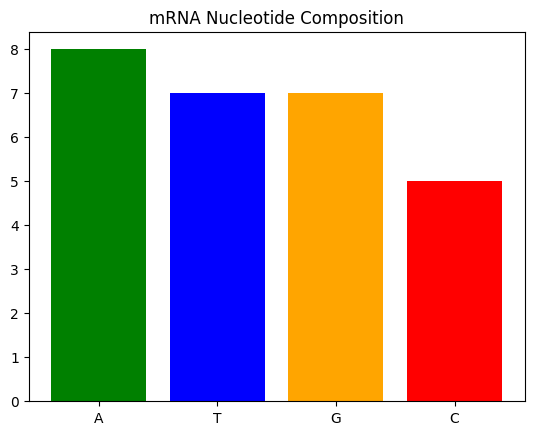

In [31]:
# Visualization: show nucleotide composition of mRNA as barplot with color=['green','blue','orange','red']

counts = {}
for nucleotide in mrna:
    counts[nucleotide] = counts.get(nucleotide, 0) + 1

plt.bar(counts.keys(), counts.values(), color=['green','blue','orange','red'])
plt.title('mRNA Nucleotide Composition')
plt.show()

## Optional Exercise 3b: Fetch Real Gene Exons from NCBI
**Objectives:**
- Use NCBI Entrez API to retrieve gene sequence
- Extract exons/CDS and translate to protein

In [40]:
# Optional: requires Biopython
from Bio import Entrez, SeqIO


Entrez.email = "your_email@example.com"  # required by NCBI

def fetch_gene_protein(gene_name: str, organism: str = "Homo sapiens") -> Optional[str]:
    """ Fetching mRNA sequence from NCBI by gene name and organism """

    # search for gene
    handle = Entrez.esearch(db="nucleotide", term=f"{gene_name}[Gene] AND {organism}[Organism]", retmax=1)
    record = Entrez.read(handle)
    handle.close()
    if not record["IdList"]:
        print("Gene not found.")
        return None

    # fetch gene
    gene_id = record["IdList"][0]
    handle = Entrez.efetch(db="nucleotide", id=gene_id, rettype="gb", retmode="text")
    gb_record = SeqIO.read(handle, "genbank")
    handle.close()

    # extract exons
    exons = []
    for feature in gb_record.features:
        if feature.type == "CDS":
            exon_seq = feature.location.extract(gb_record).seq
            exons.append(str(exon_seq))
    if not exons:
        print("No CDS/exons found for this gene.")
        return None
    mrna_seq = "".join(exons)
    return mrna_seq

# Obtain mRNA sequence for BRCA1 gene and translate to protein sequence
gene_name = "BRCA1"


In [41]:
fetch_gene_protein(gene_name)

No CDS/exons found for this gene.


## Exercise 4: Translation Efficiency Simulation
**Objectives:**
- Calculate translation time based on codon availability
- Determine mean translation time for a protein

Per-residue translation times: [0.06666667 0.12152778        inf        inf]
Mean translation time: inf


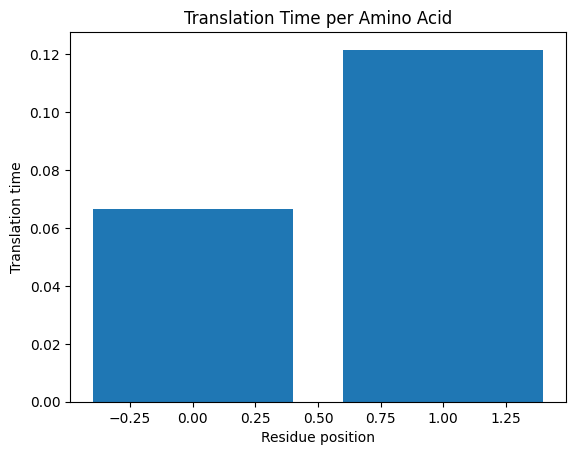

In [42]:
# Example tRNA abundance table (arbitrary values)
from numpy import ndarray


tRNA_table = {
    'GCT': 5,'GCC': 10,'GCA': 4,'GCG': 8,
    'ATG': 15,
    'GGT': 8,'GGC': 12,'GGA': 6,'GGG': 9,
    'TAA': 0,'TAG': 0,'TGA': 0  # stop codons
}

# Translation speed = 1/tRNA abundance
def calculate_translation_time(nucleotide_seq: str, tRNA_table: dict = tRNA_table) -> int:
    """ Calculate translation time for a nucleotide sequence """
    codons = [nucleotide_seq[i:i+3] for i in range(0, len(nucleotide_seq), 3)]
    translation_time = 0
    for codon in codons:
        if codon in tRNA_table and tRNA_table[codon] > 0:
            translation_time += 1 / tRNA_table[codon]
        else:
            translation_time += float('inf')  # Penalize unknown or stop codons
    return translation_time

def calculate_per_residue_mean_translation_time(protein_seq: str, codon_table: dict = codon_table, tRNA_table: dict = tRNA_table) -> ndarray:
    """ Calculate per-residue mean translation time for a protein sequence as mean over all source nucleotide sequences """
    per_residue_times = []
    for i, aa in enumerate(protein_seq):
        codons = codon_table.get(aa, [])
        if not codons:
            per_residue_times.append(float('inf'))
            continue
        times = []
        for codon in codons:
            time = calculate_translation_time(codon, tRNA_table)
            times.append(time)
        mean_time = np.mean(times)
        per_residue_times.append(mean_time)
    return np.array(per_residue_times)


translation_times = calculate_per_residue_mean_translation_time(prot)
print(f"Per-residue translation times: {translation_times}")
print(f"Mean translation time: {translation_times.mean():.2f}")     # Is mean of means actually the mean translation time for the protein?

# Implement barplot showing translation time per amino acid
plt.bar(range(len(translation_times)), translation_times)
plt.xlabel('Residue position')
plt.ylabel('Translation time')
plt.title('Translation Time per Amino Acid')
plt.show()

## Exercise 5: Sequence Analysis Pipeline
**Objectives:**
- Integrate previous steps
- Visualize composition and translation efficiency

NS [NucleotideSequence("ATGGGTCGTATGGGTCGT", ambiguous=False), NucleotideSequence("ATGGGTCGTATGGGTCGC", ambiguous=False), NucleotideSequence("ATGGGTCGTATGGGTCGA", ambiguous=False), NucleotideSequence("ATGGGTCGTATGGGTCGG", ambiguous=False), NucleotideSequence("ATGGGTCGTATGGGTAGA", ambiguous=False), NucleotideSequence("ATGGGTCGTATGGGTAGG", ambiguous=False), NucleotideSequence("ATGGGTCGTATGGGCCGT", ambiguous=False), NucleotideSequence("ATGGGTCGTATGGGCCGC", ambiguous=False), NucleotideSequence("ATGGGTCGTATGGGCCGA", ambiguous=False), NucleotideSequence("ATGGGTCGTATGGGCCGG", ambiguous=False), NucleotideSequence("ATGGGTCGTATGGGCAGA", ambiguous=False), NucleotideSequence("ATGGGTCGTATGGGCAGG", ambiguous=False), NucleotideSequence("ATGGGTCGTATGGGACGT", ambiguous=False), NucleotideSequence("ATGGGTCGTATGGGACGC", ambiguous=False), NucleotideSequence("ATGGGTCGTATGGGACGA", ambiguous=False), NucleotideSequence("ATGGGTCGTATGGGACGG", ambiguous=False), NucleotideSequence("ATGGGTCGTATGGGAAGA", ambiguous=F

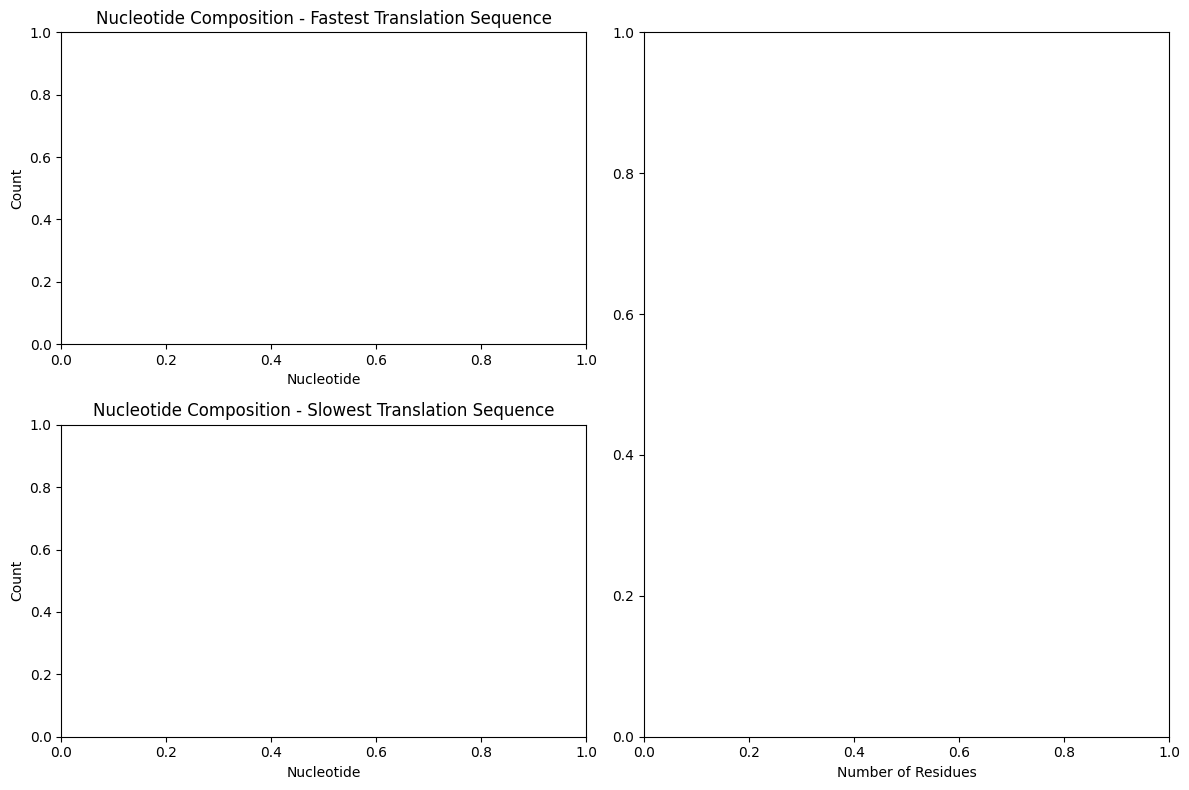

In [44]:
# Input: protein sequence
protein_input = ProteinSequence('MGRMGR')

# Reverse translate
dna_seq = reverse_translate(protein_input)[0]
print(f"DNA candidate: {dna_seq}")

# Translate back to protein (frame 0)
protein_check = dna_seq.translate(complete=True)        # what happens, if complete=False?
print(f"Translated back: {protein_check}")

# Propose a sequence with the fastest, and the slowest translation time
fastest_translation_sequence = NucleotideSequence('')
slowest_translation_sequence = NucleotideSequence('')

# Implement the function calculating the per-residue translation time starting from nucleotide sequence
def per_res_translation_time(nucleotide_seq: str, tRNA_table: dict = tRNA_table) -> ndarray:
    """ Calculate per-residue translation time for a nucleotide sequence """
    pass

# Calculate the translation time for the proposed sequences
fastest_translation_time = per_res_translation_time(fastest_translation_sequence)
slowest_translation_time = per_res_translation_time(slowest_translation_sequence)

# Visualization
# Create a plot with the following subplots:
# 1. Barplot of nucleotide composition of the fastest folding DNA sequence
# 2. Barplot of nucleotide composition of the slowest folding DNA sequence below the first one
# 3. Line plot of total translation time as a function of the number of residues for fastest and slowest folding DNA sequence

# Create figure with subplots: 2 plots in left column, 1 larger plot in right panel
fig = plt.figure(figsize=(12, 8))

# Left column: two subplots stacked vertically
ax1 = plt.subplot2grid((2, 2), (0, 0))  # Top left
ax2 = plt.subplot2grid((2, 2), (1, 0))  # Bottom left

# Right panel: one larger subplot spanning both rows
ax3 = plt.subplot2grid((2, 2), (0, 1), rowspan=2)  # Right side, spans both rows

# ax1 - barplot of nucleotide composition of the fastest folding DNA sequence
ax1.set_xlabel('Nucleotide')
ax1.set_ylabel('Count')
ax1.set_title('Nucleotide Composition - Fastest Translation Sequence')

# ax2 - barplot of nucleotide composition of the slowest folding DNA sequence
ax2.set_xlabel('Nucleotide')
ax2.set_ylabel('Count')
ax2.set_title('Nucleotide Composition - Slowest Translation Sequence')

# ax3 - line plot of total translation time as a function of the number of residues for fastest and slowest folding DNA sequence
ax3.set_xlabel('Number of Residues')

# Adjust layout to prevent overlap
plt.tight_layout()

# Show the plot
plt.show()
